Aircraft Risk Analysis

1. Project Aim

The goal of this project is to identify the safest aircraft for the company to invest in the aviation industry. 


2. Key Questions to Explore 

→ Which aircraft make has the highest and lowest number of accidents?

→ Which aircraft model has the highest and lowest number of accidents?

→ What is the trend of accidents over time for different aircraft make?

→ Which phases of flight experiences the highest and lowest number of accidents?

→ Does weather conditions that contribute to more accidents for certain aircraft makes?

→ Which aircraft makes experience the most and least severe damage in accidents?

→ Which aircraft makes have the highest and lowest number of uninjured passengers in accidents


3. Approach  to Use
 
→  **Load and explore the dataset** – Understand the structure of the data.  
→  **Data cleaning** – Handle missing values, remove duplicates, and fix inconsistencies.  
→  **Data analysis** – Identify trends and patterns in accident risk.  
→  **Visualization** – Create charts and graphs to present key insights.  
→  **Conclusion** – Summarize findings and recommend the safest aircraft for the company.

Importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#matplotlib plots will appear directly below the cell in which the plot fuction is called
%matplotlib inline

In [2]:
#find the file path
!ls 

AviationData.csv
Cleaned_Aviation.xlsx
Images
README.md
USState_Codes.csv
index.ipynb


Read in the csv files

In [5]:
df = pd.read_csv("AviationData.csv")
df

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 5: invalid continuation byte

In [6]:
#find the correct encoding that work to read the csv file

# Import encoding aliases available in Python
from encodings.aliases import aliases #python has a file containing a dictionary of encoding names and associated aliases

alias_values = set(aliases.values()) #creates a set of all available encodings

for encoding in set(aliases.values()):
    try:
        df = pd.read_csv("AviationData.csv", nrows = 10,encoding = encoding)#read in only the 10 lines for faster read
        print('successful',encoding)
    except:
        pass


successful gbk
successful cp500
successful big5
successful mac_roman
successful koi8_r
successful mac_greek
successful gb2312
successful iso2022_jp_1
successful euc_kr
successful cp857
successful iso8859_15
successful cp864
successful cp865
successful latin_1
successful mac_cyrillic
successful cp1252
successful iso2022_jp
successful ascii
successful big5hkscs
successful cp860
successful iso2022_kr
successful cp437
successful cp861
successful cp1254
successful mbcs
successful hp_roman8
successful cp1125
successful cp869
successful utf_8
successful cp852
successful cp1253
successful mac_iceland
successful cp1250
successful cp1251
successful cp1140
successful hz
successful iso8859_10
successful euc_jisx0213
successful shift_jis
successful iso8859_14
successful iso8859_3
successful cp866
successful iso8859_8
successful cp1258
successful johab
successful cp1257
successful cp1256
successful iso8859_6
successful cp862
successful euc_jis_2004
successful mac_turkish
successful cp863
successful 

In [7]:
#Read in the AviationData.csv file
Aviation = pd.read_csv("AviationData.csv", encoding= "latin_1" ,low_memory=False )

#latin_1 → Works well for Western characters and avoids UnicodeDecodeError.

Explore the dataset

In [8]:
Aviation.head() #check the first 5 rows

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [9]:
Aviation.tail() #check the last 5 rows

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [10]:
Aviation.shape # check the shape of the data. it has 88889 rows and 31 columns.

(88889, 31)

In [11]:
Aviation.index # check the row labels of the data

RangeIndex(start=0, stop=88889, step=1)

In [12]:
Aviation.info() # get the summary information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [13]:
Aviation.describe() #summary statistics of the numerical column


,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [14]:
Aviation.describe(include = "object") #summary statistics of the non numerical columns

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Amateur.Built,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,88889,88889,88889,88837,88663,34382,34373,50249,52790,...,88787,81812,32023,12582,82697,16648,84397,61724,82508,75118
unique,87951,2,88863,14782,27758,219,25589,27154,10375,24871,...,2,13,31,3,26,13590,4,12,17075,2924
top,20001212X19172,Accident,DCA22WA172,1984-06-30,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,...,No,Reciprocating,091,NSCH,Personal,Pilot,VMC,Landing,Probable Cause,25-09-2020
freq,3,85015,2,25,434,82248,19,24,1488,240,...,80312,69530,18221,4474,49448,258,77303,15428,61754,17019


DATA CLEANING

In [27]:
Aviation.columns #list of the available columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [28]:
# make a copy of the dataset to work on it
Aviation_1=  Aviation
Aviation_1

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [29]:
Aviation_1.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [30]:
#1. Check missing Values
Aviation_1.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

Handle the missing values in numeric columns

In [31]:
#fill in the Nan Values in the numerical columns with the mean & Median depending on the skewness of the data


numeric_columns= ["Number.of.Engines","Total.Fatal.Injuries","Total.Serious.Injuries","Total.Minor.Injuries","Total.Uninjured"]

for col in numeric_columns:
    mean = Aviation_1[col].mean()
    median = Aviation_1[col].median()
    
    if mean > median: #right skew
        Aviation_1[col].fillna(median, inplace = True)
    elif median > mean: #left skew
        Aviation_1[col].fillna(median, inplace = True)
    else:
        Aviation_1[col].fillna(mean, inplace = True)#normal distribution

In [32]:
Aviation_1 #to check if it worked

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,0.0,0.0,1.0,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [33]:
Aviation_1.nunique() #check the unique values in each column

Event.Id                  87951
Investigation.Type            2
Accident.Number           88863
Event.Date                14782
Location                  27758
Country                     219
Latitude                  25589
Longitude                 27154
Airport.Code              10375
Airport.Name              24871
Injury.Severity             109
Aircraft.damage               4
Aircraft.Category            15
Registration.Number       79105
Make                       8237
Model                     12318
Amateur.Built                 2
Number.of.Engines             7
Engine.Type                  13
FAR.Description              31
Schedule                      3
Purpose.of.flight            26
Air.carrier               13590
Total.Fatal.Injuries        125
Total.Serious.Injuries       50
Total.Minor.Injuries         57
Total.Uninjured             379
Weather.Condition             4
Broad.phase.of.flight        12
Report.Status             17075
Publication.Date           2924
dtype: i

Handle the missing values in Categorical columns

In [34]:
#first establish the categorical/non numeric columns
categorical_columns = Aviation_1.select_dtypes(include = ["object"]).columns.tolist()#convert the dataframe to output list of the cols
categorical_columns

['Event.Id',
 'Investigation.Type',
 'Accident.Number',
 'Event.Date',
 'Location',
 'Country',
 'Latitude',
 'Longitude',
 'Airport.Code',
 'Airport.Name',
 'Injury.Severity',
 'Aircraft.damage',
 'Aircraft.Category',
 'Registration.Number',
 'Make',
 'Model',
 'Amateur.Built',
 'Engine.Type',
 'FAR.Description',
 'Schedule',
 'Purpose.of.flight',
 'Air.carrier',
 'Weather.Condition',
 'Broad.phase.of.flight',
 'Report.Status',
 'Publication.Date']

In [35]:
#fill in the Nan Values in the categorical columns with the most frequent value

Aviation_1[categorical_columns] = Aviation_1[categorical_columns].apply(lambda x: x.fillna(x.mode().iloc[0]))

# fill with the first most frequent value

In [36]:
Aviation_1 #check if it worked

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,332739N,0112457W,NONE,Private,...,Personal,Pilot,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,25-09-2020
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,332739N,0112457W,NONE,Private,...,Personal,Pilot,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NONE,Private,...,Personal,Pilot,3.0,0.0,0.0,1.0,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,332739N,0112457W,NONE,Private,...,Personal,Pilot,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,332739N,0112457W,NONE,Private,...,Personal,Pilot,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,332739N,0112457W,NONE,Private,...,Personal,Pilot,0.0,1.0,0.0,0.0,VMC,Landing,Probable Cause,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,332739N,0112457W,NONE,Private,...,Personal,Pilot,0.0,0.0,0.0,0.0,VMC,Landing,Probable Cause,25-09-2020
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,Pilot,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,332739N,0112457W,NONE,Private,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,VMC,Landing,Probable Cause,25-09-2020


In [37]:
#2. Check for duplicates
Aviation_1.duplicated().sum() # no duplicated rows

0

In [38]:
#3.Format datatypes 
#Publication.Date  from object to date dtype

Aviation_1["Publication.Date"] = pd.to_datetime(Aviation_1["Publication.Date"])


In [39]:
Aviation_1["Event.Date"] = pd.to_datetime(Aviation_1["Event.Date"])

In [40]:
Aviation_1.info() #check if it worked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      88889 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88889 non-null  object        
 5   Country                 88889 non-null  object        
 6   Latitude                88889 non-null  object        
 7   Longitude               88889 non-null  object        
 8   Airport.Code            88889 non-null  object        
 9   Airport.Name            88889 non-null  object        
 10  Injury.Severity         88889 non-null  object        
 11  Aircraft.damage         88889 non-null  object        
 12  Aircraft.Category       88889 non-null  object

In [41]:
Aviation_2 = Aviation_1 #make a copy of the dataframe before removing outliers
Aviation_2

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,332739N,0112457W,NONE,Private,...,Personal,Pilot,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,2020-09-25
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,332739N,0112457W,NONE,Private,...,Personal,Pilot,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,1996-09-19
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NONE,Private,...,Personal,Pilot,3.0,0.0,0.0,1.0,IMC,Cruise,Probable Cause,2007-02-26
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,332739N,0112457W,NONE,Private,...,Personal,Pilot,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,2000-12-09
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,332739N,0112457W,NONE,Private,...,Personal,Pilot,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,1980-04-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,332739N,0112457W,NONE,Private,...,Personal,Pilot,0.0,1.0,0.0,0.0,VMC,Landing,Probable Cause,2022-12-29
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,332739N,0112457W,NONE,Private,...,Personal,Pilot,0.0,0.0,0.0,0.0,VMC,Landing,Probable Cause,2020-09-25
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,Pilot,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,2022-12-27
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,332739N,0112457W,NONE,Private,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,VMC,Landing,Probable Cause,2020-09-25


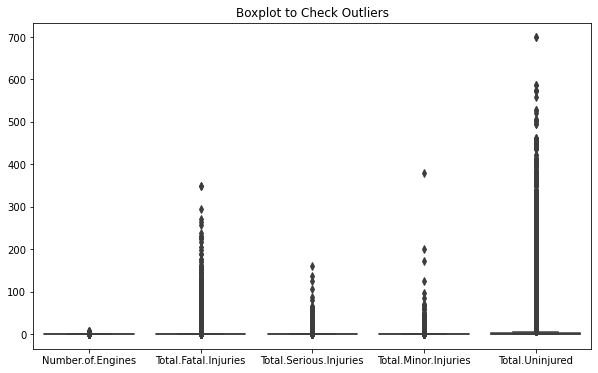

In [42]:
#4. Check Outliers

plt.figure(figsize=(10,6))
sns.boxplot(data = Aviation_2[numeric_columns])
plt.title("Boxplot to Check Outliers")
plt.show()

In [43]:
#handle the outliers

def remove_outliers(Aviation_2,numeric_columns):
    
    Aviation_clean = Aviation_2
    
    for col in numeric_columns:
        Q1 = Aviation_clean[col].quantile(0.25) #25th percentile
        Q3 = Aviation_clean[col].quantile(0.75) #75th percentile
        IQR = Q3 - Q1 #interquartile range
        
        #define limits
        lower_bound = Q1 -1.5 *IQR
        upper_bound = Q3 + 1.5 *IQR
        
        #remove outliers
        Aviation_clean = Aviation_clean[(Aviation_clean[col] >= lower_bound) & (Aviation_clean[col]<= upper_bound)]
        
    return Aviation_clean #cleaned dataframe

In [44]:
Aviation_clean = remove_outliers(Aviation_2,numeric_columns)
Aviation_clean

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,332739N,0112457W,NONE,BLACKBURN AG STRIP,...,Personal,Pilot,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,1982-01-01
10,20020909X01559,Accident,FTW82DA034,1982-01-01,"HOBBS, NM",United States,332739N,0112457W,NONE,Private,...,Personal,Pilot,0.0,0.0,0.0,1.0,VMC,Approach,Probable Cause,1982-01-01
11,20020909X01558,Accident,ATL82DKJ10,1982-01-01,"TUSKEGEE, AL",United States,332739N,0112457W,NONE,TUSKEGEE,...,Personal,Pilot,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,1982-01-01
16,20020917X01962,Accident,DEN82DTM08,1982-01-02,"MIDWAY, UT",United States,332739N,0112457W,NONE,FIELD RANCH,...,Personal,Pilot,0.0,0.0,0.0,1.0,IMC,Taxi,Probable Cause,1983-02-01
18,20020917X02481,Accident,NYC82DA016,1982-01-02,"GALETON, PA",United States,332739N,0112457W,5G6,CHERRY SPRINGS,...,Personal,Pilot,0.0,0.0,0.0,1.0,VMC,Taxi,Probable Cause,1983-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88879,20221219106472,Accident,DCA23LA096,2022-12-18,"Kahului, HI",United States,332739N,0112457W,NONE,Private,...,Personal,HAWAIIAN AIRLINES INC,0.0,0.0,0.0,0.0,VMC,Landing,Probable Cause,2020-09-25
88880,20221219106477,Accident,WPR23LA071,2022-12-18,"San Manual, AZ",United States,332739N,0112457W,NONE,Private,...,Personal,Chandler Air Service,0.0,0.0,0.0,3.0,VMC,Landing,Probable Cause,2022-12-20
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,332739N,0112457W,NONE,Private,...,Personal,Pilot,0.0,0.0,0.0,0.0,VMC,Landing,Probable Cause,2020-09-25
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,Pilot,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,2022-12-27


In [45]:
#to check if the outliers have been removed

print(len(Aviation_2))
len(Aviation_clean) #difference in no.of rows

88889


37819

In [46]:
# Replace original with cleaned data  
Aviation_2 = Aviation_clean  
Aviation_2

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,332739N,0112457W,NONE,BLACKBURN AG STRIP,...,Personal,Pilot,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,1982-01-01
10,20020909X01559,Accident,FTW82DA034,1982-01-01,"HOBBS, NM",United States,332739N,0112457W,NONE,Private,...,Personal,Pilot,0.0,0.0,0.0,1.0,VMC,Approach,Probable Cause,1982-01-01
11,20020909X01558,Accident,ATL82DKJ10,1982-01-01,"TUSKEGEE, AL",United States,332739N,0112457W,NONE,TUSKEGEE,...,Personal,Pilot,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,1982-01-01
16,20020917X01962,Accident,DEN82DTM08,1982-01-02,"MIDWAY, UT",United States,332739N,0112457W,NONE,FIELD RANCH,...,Personal,Pilot,0.0,0.0,0.0,1.0,IMC,Taxi,Probable Cause,1983-02-01
18,20020917X02481,Accident,NYC82DA016,1982-01-02,"GALETON, PA",United States,332739N,0112457W,5G6,CHERRY SPRINGS,...,Personal,Pilot,0.0,0.0,0.0,1.0,VMC,Taxi,Probable Cause,1983-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88879,20221219106472,Accident,DCA23LA096,2022-12-18,"Kahului, HI",United States,332739N,0112457W,NONE,Private,...,Personal,HAWAIIAN AIRLINES INC,0.0,0.0,0.0,0.0,VMC,Landing,Probable Cause,2020-09-25
88880,20221219106477,Accident,WPR23LA071,2022-12-18,"San Manual, AZ",United States,332739N,0112457W,NONE,Private,...,Personal,Chandler Air Service,0.0,0.0,0.0,3.0,VMC,Landing,Probable Cause,2022-12-20
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,332739N,0112457W,NONE,Private,...,Personal,Pilot,0.0,0.0,0.0,0.0,VMC,Landing,Probable Cause,2020-09-25
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,Pilot,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,2022-12-27


In [47]:
Aviation_3 =   Aviation_2 #dataframe copy before dropping columns
Aviation_3

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,332739N,0112457W,NONE,BLACKBURN AG STRIP,...,Personal,Pilot,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,1982-01-01
10,20020909X01559,Accident,FTW82DA034,1982-01-01,"HOBBS, NM",United States,332739N,0112457W,NONE,Private,...,Personal,Pilot,0.0,0.0,0.0,1.0,VMC,Approach,Probable Cause,1982-01-01
11,20020909X01558,Accident,ATL82DKJ10,1982-01-01,"TUSKEGEE, AL",United States,332739N,0112457W,NONE,TUSKEGEE,...,Personal,Pilot,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,1982-01-01
16,20020917X01962,Accident,DEN82DTM08,1982-01-02,"MIDWAY, UT",United States,332739N,0112457W,NONE,FIELD RANCH,...,Personal,Pilot,0.0,0.0,0.0,1.0,IMC,Taxi,Probable Cause,1983-02-01
18,20020917X02481,Accident,NYC82DA016,1982-01-02,"GALETON, PA",United States,332739N,0112457W,5G6,CHERRY SPRINGS,...,Personal,Pilot,0.0,0.0,0.0,1.0,VMC,Taxi,Probable Cause,1983-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88879,20221219106472,Accident,DCA23LA096,2022-12-18,"Kahului, HI",United States,332739N,0112457W,NONE,Private,...,Personal,HAWAIIAN AIRLINES INC,0.0,0.0,0.0,0.0,VMC,Landing,Probable Cause,2020-09-25
88880,20221219106477,Accident,WPR23LA071,2022-12-18,"San Manual, AZ",United States,332739N,0112457W,NONE,Private,...,Personal,Chandler Air Service,0.0,0.0,0.0,3.0,VMC,Landing,Probable Cause,2022-12-20
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,332739N,0112457W,NONE,Private,...,Personal,Pilot,0.0,0.0,0.0,0.0,VMC,Landing,Probable Cause,2020-09-25
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,Pilot,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,2022-12-27


In [48]:
Aviation_3.nunique() #no of unique values in each column

Event.Id                  37594
Investigation.Type            2
Accident.Number           37805
Event.Date                12945
Location                  14563
Country                     155
Latitude                  11826
Longitude                 12183
Airport.Code               7034
Airport.Name              14369
Injury.Severity               6
Aircraft.damage               4
Aircraft.Category            12
Registration.Number       34510
Make                       3576
Model                      5617
Amateur.Built                 2
Number.of.Engines             1
Engine.Type                   8
FAR.Description              24
Schedule                      3
Purpose.of.flight            26
Air.carrier                5433
Total.Fatal.Injuries          1
Total.Serious.Injuries        1
Total.Minor.Injuries          1
Total.Uninjured               4
Weather.Condition             4
Broad.phase.of.flight        12
Report.Status              8056
Publication.Date           1585
dtype: i

With Total.Fatal.Injuries, Total.Serious.Injuries, Total.Minor.Injuries, Number.of.Engines  having 1 unique value means it wont provide any variation for analysis.

Actions taken with that information

→ Drops the columns

→ modifying the key questions to answer for my analysis

MODIFIED KEY QUESTIOS TO ANSWER

→ Which aircraft make has the highest and lowest number of accidents?

→ Which aircraft model has the highest and lowest number of accidents?

→ What is the trend of accidents over time for different aircraft make?

→ Which phases of flight experiences the highest and lowest number of accidents?

→ Does weather conditions that contribute to more accidents for certain aircraft makes?

→ Which aircraft make experience the most and least severe damage in accidents?

→ Which aircraft make have the highest and lowest number of uninjured passengers in accidents




In [49]:
Aviation_3.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [50]:
# Drop columns not needed in the analysis
columns_to_drop = ['Event.Id', 'Investigation.Type','Location', 'Country', 'Latitude', 'Longitude','Airport.Code','Airport.Name', 'Injury.Severity','Registration.Number','Amateur.Built', 'Number.of.Engines','FAR.Description','Schedule', 'Purpose.of.flight','Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries','Report.Status',
       'Publication.Date']
Aviation_3 = Aviation_3.drop(columns = columns_to_drop)

In [51]:
Aviation_3.columns #check if it worked


Index(['Accident.Number', 'Event.Date', 'Aircraft.damage', 'Aircraft.Category',
       'Make', 'Model', 'Engine.Type', 'Air.carrier', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight'],
      dtype='object')

In [52]:
Aviation_3

,Accident.Number,Event.Date,Aircraft.damage,Aircraft.Category,Make,Model,Engine.Type,Air.carrier,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
7,SEA82DA022,1982-01-01,Substantial,Airplane,Cessna,140,Reciprocating,Pilot,2.0,VMC,Takeoff
10,FTW82DA034,1982-01-01,Substantial,Airplane,Piper,PA-28-161,Reciprocating,Pilot,1.0,VMC,Approach
11,ATL82DKJ10,1982-01-01,Substantial,Airplane,Beech,V35B,Reciprocating,Pilot,1.0,VMC,Landing
16,DEN82DTM08,1982-01-02,Destroyed,Helicopter,Enstrom,280C,Reciprocating,Pilot,1.0,IMC,Taxi
18,NYC82DA016,1982-01-02,Substantial,Airplane,Cessna,172,Reciprocating,Pilot,1.0,VMC,Taxi
...,...,...,...,...,...,...,...,...,...,...,...
88879,DCA23LA096,2022-12-18,Substantial,Airplane,AIRBUS,A330-243,Reciprocating,HAWAIIAN AIRLINES INC,0.0,VMC,Landing
88880,WPR23LA071,2022-12-18,Substantial,Airplane,PIPER,PA28,Reciprocating,Chandler Air Service,3.0,VMC,Landing
88885,ERA23LA095,2022-12-26,Substantial,Airplane,BELLANCA,7ECA,Reciprocating,Pilot,0.0,VMC,Landing
88886,WPR23LA075,2022-12-26,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,Reciprocating,Pilot,1.0,VMC,Landing


In [53]:
#lowercase to ensure consistency in both the notebook and tableau
Aviation_3['Make'] = Aviation_3['Make'] .str.lower()
Aviation_3['Make']

7                            cessna
10                            piper
11                            beech
16                          enstrom
18                           cessna
                    ...            
88879                        airbus
88880                         piper
88885                      bellanca
88886    american champion aircraft
88887                        cessna
Name: Make, Length: 37819, dtype: object

In [54]:
Aviation_3 #check if it worked

,Accident.Number,Event.Date,Aircraft.damage,Aircraft.Category,Make,Model,Engine.Type,Air.carrier,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
7,SEA82DA022,1982-01-01,Substantial,Airplane,cessna,140,Reciprocating,Pilot,2.0,VMC,Takeoff
10,FTW82DA034,1982-01-01,Substantial,Airplane,piper,PA-28-161,Reciprocating,Pilot,1.0,VMC,Approach
11,ATL82DKJ10,1982-01-01,Substantial,Airplane,beech,V35B,Reciprocating,Pilot,1.0,VMC,Landing
16,DEN82DTM08,1982-01-02,Destroyed,Helicopter,enstrom,280C,Reciprocating,Pilot,1.0,IMC,Taxi
18,NYC82DA016,1982-01-02,Substantial,Airplane,cessna,172,Reciprocating,Pilot,1.0,VMC,Taxi
...,...,...,...,...,...,...,...,...,...,...,...
88879,DCA23LA096,2022-12-18,Substantial,Airplane,airbus,A330-243,Reciprocating,HAWAIIAN AIRLINES INC,0.0,VMC,Landing
88880,WPR23LA071,2022-12-18,Substantial,Airplane,piper,PA28,Reciprocating,Chandler Air Service,3.0,VMC,Landing
88885,ERA23LA095,2022-12-26,Substantial,Airplane,bellanca,7ECA,Reciprocating,Pilot,0.0,VMC,Landing
88886,WPR23LA075,2022-12-26,Substantial,Airplane,american champion aircraft,8GCBC,Reciprocating,Pilot,1.0,VMC,Landing


START ANSWERING QSNS


In [55]:
Aviation_3.columns

Index(['Accident.Number', 'Event.Date', 'Aircraft.damage', 'Aircraft.Category',
       'Make', 'Model', 'Engine.Type', 'Air.carrier', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight'],
      dtype='object')

1. Which aircraft make has the highest and lowest number of accidents?

In [56]:
#total accidents for each aircraft make
Total_accidents_by_make = Aviation_3['Make'].value_counts()

#highest and lowest number of accidents
highest_accidents_make = Total_accidents_by_make.idxmax(),Total_accidents_by_make.max()
lowest_accidents_make = Total_accidents_by_make.idxmin(),Total_accidents_by_make.min()


print(highest_accidents_make)
print(lowest_accidents_make)

('cessna', 13895)
('charles s.hatchette', 1)


2. Aircraft model has the highest and lowest number of accidents?

In [57]:
#total accidents for each aircraft model
Total_accidents_by_model = Aviation_3['Model'].value_counts()

#highest and lowest number of accidents
highest_accidents_model = Total_accidents_by_model.idxmax(),Total_accidents_by_model.max()
lowest_accidents_model = Total_accidents_by_model.idxmin(),Total_accidents_by_model.min()


print(highest_accidents_model)
print(lowest_accidents_model)


('152', 1709)
('AUTOGYRO MTO SPORT', 1)


3. What is the trend of accidents over time for different aircraft make?

In [58]:
Aviation_3['Event.Date'].dtype #check if the datatype is in datetime


dtype('<M8[ns]')

In [59]:
#extract datetime information from "Event.Date" i.e years,Months
#Create a year column
Aviation_3['Year'] = Aviation_3['Event.Date'].dt.year
Aviation_3['Year']

7        1982
10       1982
11       1982
16       1982
18       1982
         ... 
88879    2022
88880    2022
88885    2022
88886    2022
88887    2022
Name: Year, Length: 37819, dtype: int64

In [60]:
#Create a month column
Aviation_3['Month'] = Aviation_3['Event.Date'].dt.month
Aviation_3['Month']

7         1
10        1
11        1
16        1
18        1
         ..
88879    12
88880    12
88885    12
88886    12
88887    12
Name: Month, Length: 37819, dtype: int64

In [61]:
Aviation_3.columns

Index(['Accident.Number', 'Event.Date', 'Aircraft.damage', 'Aircraft.Category',
       'Make', 'Model', 'Engine.Type', 'Air.carrier', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Year', 'Month'],
      dtype='object')

In [62]:
#accidents trends over the years for different aircraft make
accidents_trend_by_make = Aviation_3.groupby('Year')['Make'].value_counts()
accidents_trend_by_make

Year  Make                     
1982  cessna                       675
      piper                        308
      beech                         76
      grumman                       60
      bell                          48
                                  ... 
2022  waszak arthur b                1
      weatherly aviation co inc      1
      wight albert a                 1
      william l bell                 1
      wingren norman                 1
Name: Make, Length: 6707, dtype: int64

In [63]:
#accidents trends over the months for different aircraft make
accidents_trend_by_make = Aviation_3.groupby('Month')['Make'].value_counts()
accidents_trend_by_make


Month  Make        
1      cessna          812
       piper           335
       beech            77
       bell             53
       boeing           51
                      ... 
12     wiedemann         1
       wragg george      1
       wyman             1
       zenith            1
       zlin              1
Name: Make, Length: 5412, dtype: int64

4. Which phases of flight experiences the highest  and lowest number of accidents?

In [64]:
#total no of accidents per phases of flight
accidents_by_flight_phases = Aviation_3['Broad.phase.of.flight'].value_counts()

#highest and lowest number of accidents in flight phases
highest_accidents_phase = accidents_by_flight_phases.idxmax(),accidents_by_flight_phases.max()
lowest_accidents_phase = accidents_by_flight_phases.idxmin(),accidents_by_flight_phases.min()


print(highest_accidents_phase)
print(lowest_accidents_phase)


('Landing', 21470)
('Other', 39)


5. Does weather conditions that contribute to more accidents for certain aircraft makes?

In [65]:
#no. of accidents per aircraft make in each weather condition
weather_accidents_by_make = Aviation_3.groupby('Weather.Condition')['Make'].value_counts()
weather_accidents_by_make

Weather.Condition  Make            
IMC                cessna              211
                   piper               110
                   beech                47
                   mooney               22
                   bell                 13
                                      ... 
VMC                zlin aviation         1
                   zuber thomas p        1
                   zukowski              1
                   zwart                 1
                   zwicker murray r      1
Name: Make, Length: 3409, dtype: int64

6. Which aircraft make experience the most and least severe damage in accidents?

In [66]:
Aviation_3['Aircraft.damage'].unique()

array(['Substantial', 'Destroyed', 'Minor', 'Unknown'], dtype=object)

In [67]:
#no. of accidents per aircraft make by damage 
damage_accidents_by_make = Aviation_3.groupby('Aircraft.damage')['Make'].value_counts()

#most damaged Aircraft make
Substantial_damage = damage_accidents_by_make.loc['Substantial'].idxmax()
Destroyed_damage = damage_accidents_by_make.loc['Destroyed'].idxmax()

#least damaged Aircraft make
Minor_damage = damage_accidents_by_make.loc['Minor'].idxmin()
Unknown_damage = damage_accidents_by_make.loc['Unknown'].idxmin()


print(f'Aircraft make with most Substantial damages is:{Substantial_damage}')
print(f'Aircraft make with most destroyed cases is:{Destroyed_damage}')
print(f'Aircraft make with least Minor damages is:{Destroyed_damage}')
print(f'Aircraft make with least Unknown damages is:{Destroyed_damage}')

Aircraft make with most Substantial damages is:cessna
Aircraft make with most destroyed cases is:cessna
Aircraft make with least Minor damages is:cessna
Aircraft make with least Unknown damages is:cessna


7. Which aircraft make have the highest and lowest number of uninjured passengers in accidents

In [68]:
#total no of uninjured passengers per aircraft make
uninjured_by_make = Aviation_3.groupby('Make')['Total.Uninjured'].sum()

#highest and lowest uninjured passengers by Aircraft make
highest_uninjured_by_make = uninjured_by_make.idxmax(),uninjured_by_make.max()
lowest_uninjured_by_make = uninjured_by_make.idxmin(),uninjured_by_make.min()


print(highest_uninjured_by_make)
print(lowest_uninjured_by_make)


('cessna', 21054.0)
('777', 0.0)


Export the cleaned dataset for visualization in tableau

In [ ]:
#export as an  excel file
Aviation_3.to_excel('Cleaned_Aviation.xlsx',index = False)